### Regression inputs and outputs

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

|Hyperparameter       |Typical VaLue    |
|:-----------------   |:-----------------|
|Hidden activation    |Usually Relu         |
|Output activation    |None, Relu, logistic/tanh|
|Loss Function|MSE(Mean Square Error) or MAE (Mean Absolute Error)/ Huber(comb of MSE and MAE)|
|Optimizer|SGD (Stochastic Gradient Descent), Adam|


|Hyperparameter	|Typical value|
|---------------|-------------|
|Input layer shape|	Same shape as number of features (e.g. 3 for # bedrooms, # bathrooms, # car spaces in housing price prediction)|
|Hidden layer(s)|	Problem specific, minimum = 1, maximum = unlimited|
|Neurons per hidden layer|	Problem specific, generally 10 to 100|
|Output layer shape|	Same shape as desired prediction shape (e.g. 1 for house price)|
|Hidden activation|	Usually ReLU (rectified linear unit)|
|Output activation|	None, ReLU, logistic/tanh|
|Loss function|	MSE (mean square error) or MAE (mean absolute error)/Huber (combination of MAE/MSE) if outliers|
|Optimizer|	SGD (stochastic gradient descent), Adam|

In [ ]:
print(tf.__version__)

2.13.0


In [ ]:
X = tf.constant([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels (using tensors)
y = tf.constant([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

In [ ]:
# Find Input and Output Shape

In [ ]:
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])

In [ ]:
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
# shape (3,) and (1,)

In [ ]:
X.shape, y.shape

(TensorShape([8]), TensorShape([8]))

In [ ]:
X[0].shape, y[0].shape

(TensorShape([]), TensorShape([]))

In [ ]:
# Problemm

Note: If you're using TensorFlow 2.7.0+, the fit() function no longer upscales input data to go from **(batch_size, )** to **(batch_size, 1)**. To fix this, you'll need to expand the dimension of input data using tf.expand_dims(input_data, axis=-1).

In our case, this means instead of using model.fit(X, y, epochs=5), use model.fit(tf.expand_dims(X, axis=-1), y, epochs=5).

To improve our model, we alter almost every part of the 3 steps we went through before.

1. Creating a model - here you might want to add more layers, increase the number of hidden units (also called neurons) within each layer, change the activation functions of each layer.
2. Compiling a model - you might want to choose optimization function or perhaps change the learning rate of the optimization function.
3. Fitting a model - perhaps you could fit a model for more epochs (leave it training for longer) or on more data (give the model more examples to learn from).

In [ ]:
tf.random.set_seed(42)

# 1. Create a Model using the Sequential API

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the Model

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])


# 3. Fit the model

# model.fit(X, y, epochs = 5) in 2.7 this cause error because of shape of X we have to give feature number

model.fit(tf.expand_dims(X, axis = -1), y, epochs = 5)

Epoch 1/5
1/1 [==============================] - 0s 411ms/step - loss: 15.5286 - mae: 15.5286
Epoch 2/5
1/1 [==============================] - 0s 11ms/step - loss: 15.2474 - mae: 15.2474
Epoch 3/5
1/1 [==============================] - 0s 15ms/step - loss: 14.9699 - mae: 14.9699
Epoch 4/5
1/1 [==============================] - 0s 12ms/step - loss: 14.8374 - mae: 14.8374
Epoch 5/5
1/1 [==============================] - 0s 10ms/step - loss: 14.7049 - mae: 14.7049


In [ ]:

X,y
#y = X+10

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
model.predict([17.0])
# real value 27
# 100 epoch -- 29.9

1/1 [==============================] - 0s 77ms/step


array([[-5.3824973]], dtype=float32)

1. Construct or import a pretrained model relavant to your problem

2. Compile the model(preapare it to be used with data)

  *   **Loss** - how wrong your model's predictions are
  compared to the truth labels(you want to minimise this)

  *   **Optimizer** - how your mdeol should update its iternal patterns to better its predictions.

  *   **Metric** - human interpretable values for how ell your model is doing.

3. Fit the model to the training data so it can discover patterns

  *   **Epochs** - how many times the model will go through all of the training examples.

4. Evaluate the model on the test data (how reliable are our model's predictions?)







### Improving our code

1. Creating a model - here you might want to add more layers, increase the number of hidden units (also called neurons) within each layer, change the activation functions of each layer.
2. Compiling a model - you might want to choose optimization function or perhaps change the learning rate of the optimization function.
3. Fitting a model - perhaps you could fit a model for more epochs (leave it training for longer) or on more data (give the model more examples to learn from).

### Common ways to improve a deep model



*   Adding layers

*   Increase the number of hidden units

*   Change the activation functions
*   Change the optimization function


*   Change the learning rate

*   Fitting on more data
*   Fitting for longer


In [ ]:
# Now improving our model

tf.random.set_seed(42)

model = tf.keras.Sequential([
     tf.keras.layers.Dense(100, activation = "relu"),
     tf.keras.layers.Dense(100, activation = "relu"),
     tf.keras.layers.Dense(100, activation = "relu"),  # Add more layers and more units
     tf.keras.layers.Dense(1),
])

model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate= 0.0001),  # Change opt Adam,  more small leraning rate
              loss = tf.keras.losses.mae,
              metrics = ["mae"])

In [ ]:
model.fit(tf.expand_dims(X, axis = -1), y, epochs = 1500) # small lr more epochs we need

Epoch 1/1500
1/1 [==============================] - 1s 1s/step - loss: 13.5615 - mae: 13.5615
Epoch 2/1500
1/1 [==============================] - 0s 12ms/step - loss: 13.5258 - mae: 13.5258
Epoch 3/1500
1/1 [==============================] - 0s 18ms/step - loss: 13.4904 - mae: 13.4904
Epoch 4/1500
1/1 [==============================] - 0s 17ms/step - loss: 13.4555 - mae: 13.4555
Epoch 5/1500
1/1 [==============================] - 0s 14ms/step - loss: 13.4216 - mae: 13.4216
Epoch 6/1500
1/1 [==============================] - 0s 13ms/step - loss: 13.3880 - mae: 13.3880
Epoch 7/1500
1/1 [==============================] - 0s 15ms/step - loss: 13.3550 - mae: 13.3550
Epoch 8/1500
1/1 [==============================] - 0s 14ms/step - loss: 13.3222 - mae: 13.3222
Epoch 9/1500
1/1 [==============================] - 0s 13ms/step - loss: 13.2903 - mae: 13.2903
Epoch 10/1500
1/1 [==============================] - 0s 12ms/step - loss: 13.2583 - mae: 13.2583
Epoch 11/1500
1/1 [======================

In [ ]:
model.predict([17]) # much closer

1/1 [==============================] - 0s 140ms/step


array([[28.115158]], dtype=float32)

### More bigger data and Visualize

In [ ]:
X = np.arange(-100, 100, 4)

y = np.arange(-90, 110, 4)



In [ ]:
X, y

(array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
          76,   80,   84,   88,   92,   96]),
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106]))

In [ ]:
(X + 10 == y).any()

True

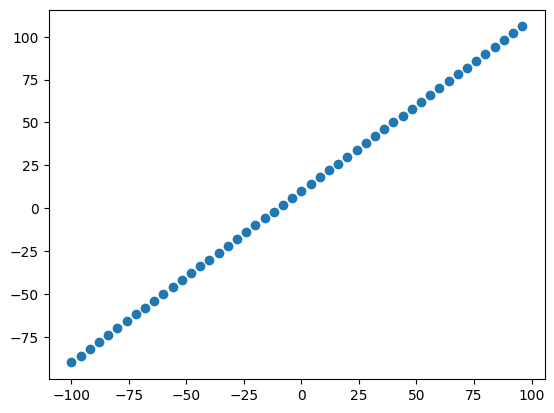

In [ ]:
# Visualize the data
plt.scatter(X, y)

In [ ]:
### Train, Test set

In [ ]:
X_train = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

len(X_train), len(X_test)

(40, 10)

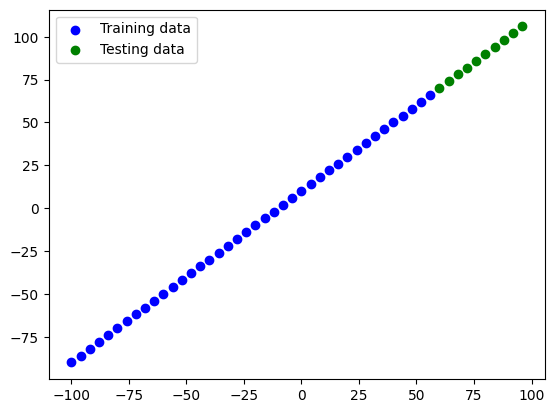

In [ ]:

plt.figure()
# Plot training data in blue
plt.scatter(X_train, y_train, c='b', label='Training data')
# Plot test data in green
plt.scatter(X_test, y_test, c='g', label='Testing data')
# Show the legend
plt.legend();


In [ ]:
X_train.shape

(40,)

In [ ]:
#we need increase dimension like (40,1)

|Data Type	|Input Shape|
|:-----------|:-----------|
|Image	|(image height, image width, number of channels)|
|Sequence|	(number of sequence steps, number of features)|
|Structured|	(samples/batch size, features)|

|Problem Type|	Output Neurons|	Target Format	|Loss Type	|Last Neuron Activation|
|----:-----|-----:-----|------:-------|-----:-----|-------:--------|
|Binary Classification	|1	|Binary|	binary_crossentropy|	sigmoid|
Multi Classification	|Number of classes|	One-Hot Encodedif not|	categorical_crossentropy	|softmax|
|Multi Classification	|Number of classes|	Label Encoded|	sparse_categorical_crossentropy	|softmax|
|Regression|	Number of predictions	|Numeric	|Any regression metric: MSE/RMSE/MSLE/Huber	| Usually None|


In [ ]:
X_train = tf.expand_dims(X_train, axis = -1)
X_test = tf.expand_dims(X_test, axis = -1)

In [ ]:
# Build a basic model

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape = [1])
])

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mse"])

In [ ]:
model.summary()   # input shape'i yazmasaydık summary çalışmazdı

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# we do not write input_shape batch/samples size

In [ ]:
model.fit(X_train, y_train,epochs = 5)

Epoch 1/5
2/2 [==============================] - 0s 12ms/step - loss: 51.4834 - mse: 3688.9199
Epoch 2/5
2/2 [==============================] - 0s 8ms/step - loss: 18.3157 - mse: 481.4055
Epoch 3/5
2/2 [==============================] - 0s 6ms/step - loss: 10.0823 - mse: 135.6209
Epoch 4/5
2/2 [==============================] - 0s 8ms/step - loss: 9.5487 - mse: 130.2170
Epoch 5/5
2/2 [==============================] - 0s 10ms/step - loss: 10.4532 - mse: 126.3098


In [ ]:
# Demekki input shape i girersek sorun çözülüyor. tf.expand_dims yapmaya gerek kalmıyor

### Visualizing the predictions

In [ ]:
y_preds = model.predict(X_test)
y_preds

1/1 [==============================] - 0s 66ms/step


array([[60.430916],
       [64.456436],
       [68.48196 ],
       [72.50748 ],
       [76.533   ],
       [80.55852 ],
       [84.58403 ],
       [88.60955 ],
       [92.63507 ],
       [96.66059 ]], dtype=float32)

In [ ]:
y_test

array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

In [ ]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_preds):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot the predictions in red (predictions were made on the test data)
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend();

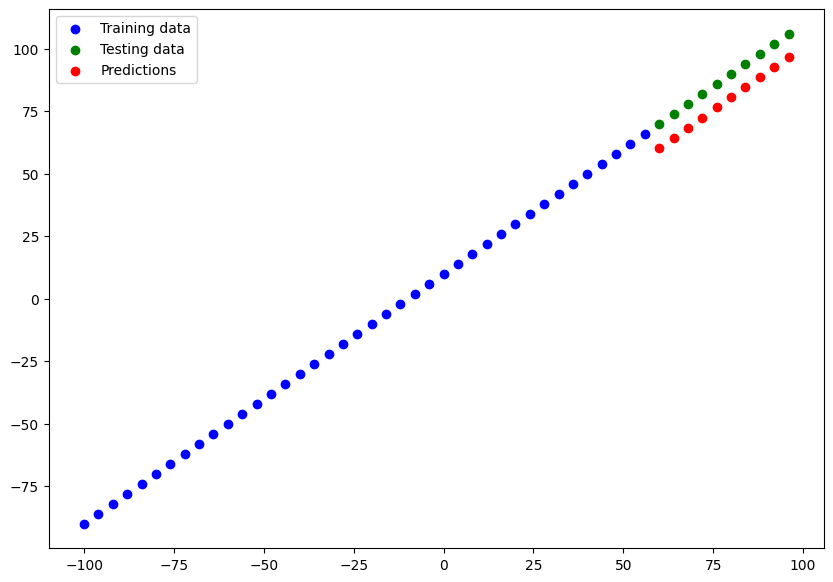

In [ ]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_preds)

In [ ]:
# Build a basic model

model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = "relu",input_shape = [1]),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(1)
])

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ["mse"])

In [ ]:
model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
2/2 [==============================] - 1s 11ms/step - loss: 42.7813 - mse: 2488.8828
Epoch 2/100
2/2 [==============================] - 0s 10ms/step - loss: 38.0611 - mse: 1963.9924
Epoch 3/100
2/2 [==============================] - 0s 10ms/step - loss: 34.4961 - mse: 1605.7584
Epoch 4/100
2/2 [==============================] - 0s 11ms/step - loss: 31.0461 - mse: 1304.1628
Epoch 5/100
2/2 [==============================] - 0s 9ms/step - loss: 27.6548 - mse: 1053.2268
Epoch 6/100
2/2 [==============================] - 0s 9ms/step - loss: 24.0134 - mse: 822.4637
Epoch 7/100
2/2 [==============================] - 0s 10ms/step - loss: 20.1851 - mse: 623.2468
Epoch 8/100
2/2 [==============================] - 0s 9ms/step - loss: 15.9708 - mse: 470.1962
Epoch 9/100
2/2 [==============================] - 0s 16ms/step - loss: 13.7253 - mse: 395.9140
Epoch 10/100
2/2 [==============================] - 0s 9ms/step - loss: 15.5605 - mse: 377.4034
Epoch 11/100
2/2 [====================

In [ ]:
y_preds = model.predict(X_test)

1/1 [==============================] - 0s 112ms/step


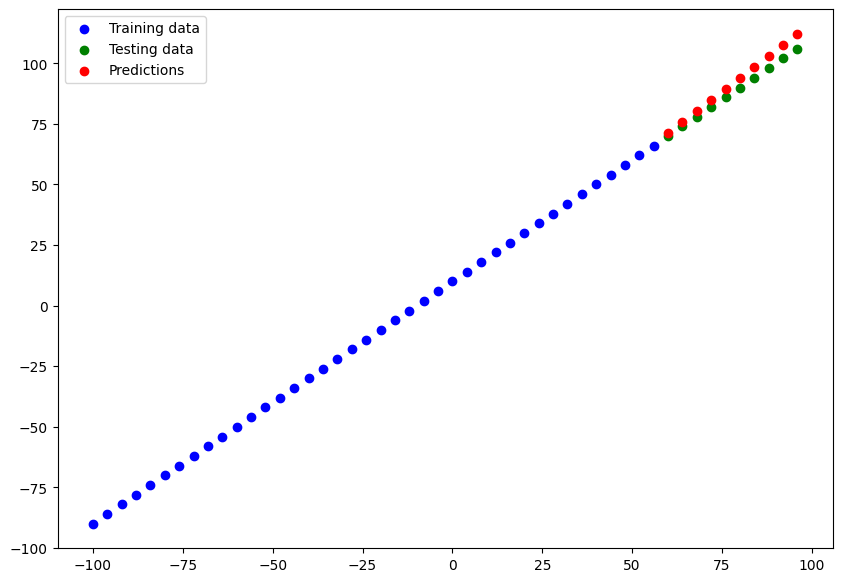

In [ ]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_preds)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = "relu",input_shape = [1]),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(1)
])

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001),
              metrics = ["mse"])

In [ ]:
model.fit(X_train, y_train, epochs = 1000)

Epoch 1/1000
2/2 [==============================] - 1s 8ms/step - loss: 41.6912 - mse: 2369.0759
Epoch 2/1000
2/2 [==============================] - 0s 9ms/step - loss: 41.2474 - mse: 2318.5881
Epoch 3/1000
2/2 [==============================] - 0s 8ms/step - loss: 40.8298 - mse: 2270.3093
Epoch 4/1000
2/2 [==============================] - 0s 8ms/step - loss: 40.3968 - mse: 2221.4304
Epoch 5/1000
2/2 [==============================] - 0s 9ms/step - loss: 39.9736 - mse: 2174.8701
Epoch 6/1000
2/2 [==============================] - 0s 9ms/step - loss: 39.5528 - mse: 2128.2402
Epoch 7/1000
2/2 [==============================] - 0s 9ms/step - loss: 39.1296 - mse: 2081.4573
Epoch 8/1000
2/2 [==============================] - 0s 8ms/step - loss: 38.6857 - mse: 2031.4352
Epoch 9/1000
2/2 [==============================] - 0s 8ms/step - loss: 38.2782 - mse: 1989.3473
Epoch 10/1000
2/2 [==============================] - 0s 9ms/step - loss: 37.8626 - mse: 1945.1855
Epoch 11/1000
2/2 [==========

1/1 [==============================] - 0s 78ms/step


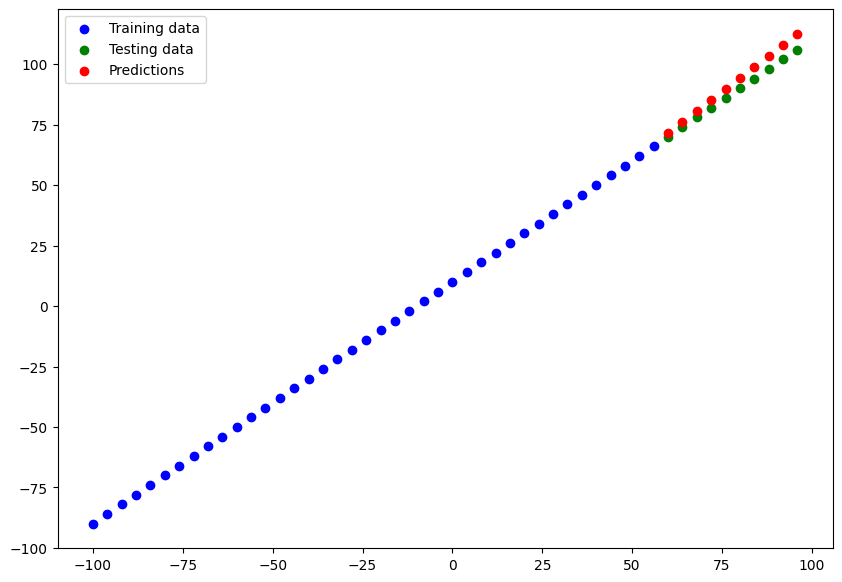

In [ ]:
y_preds = model.predict(X_test)

plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_preds)